Model Accuracy: 0.87

Confusion Matrix:
 [[14533   207   118]
 [  586 12489  2013]
 [  371  2726 11710]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     14858
           1       0.81      0.83      0.82     15088
           2       0.85      0.79      0.82     14807

    accuracy                           0.87     44753
   macro avg       0.86      0.87      0.86     44753
weighted avg       0.86      0.87      0.86     44753



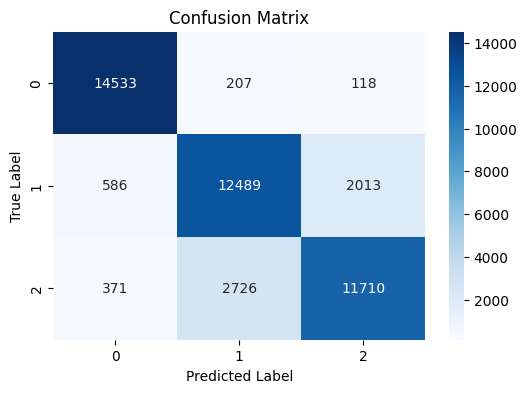

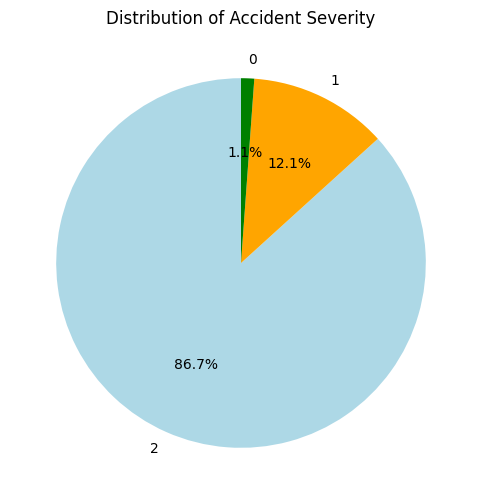

<ipython-input-2-ab35cc3c56af>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


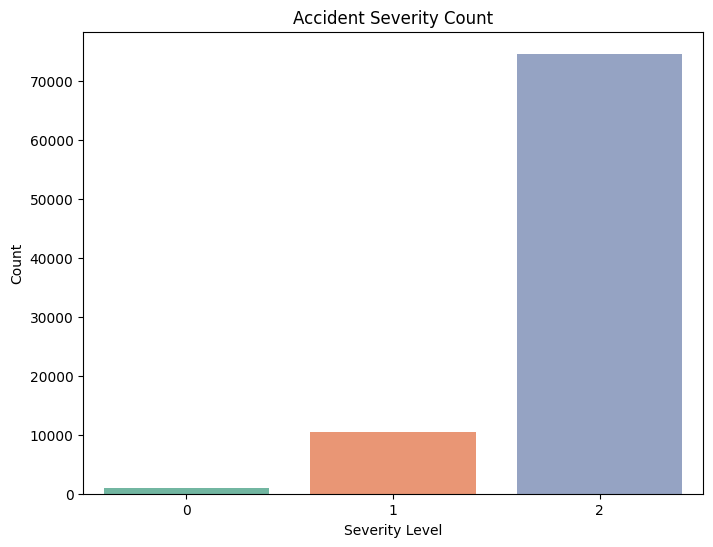

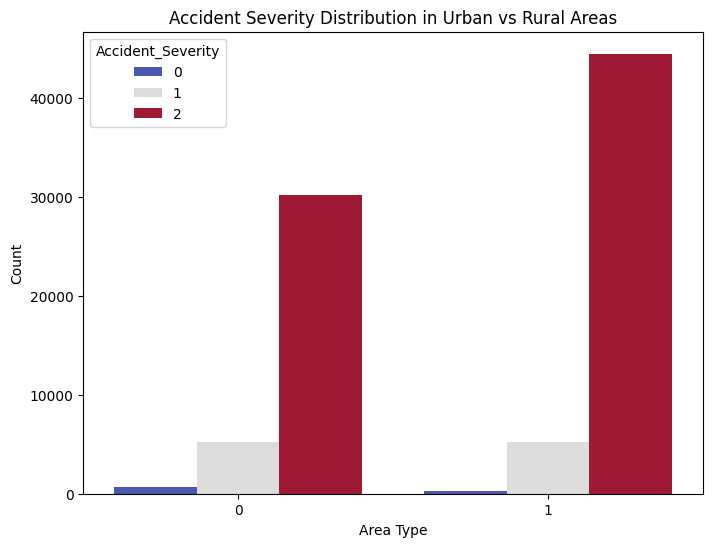

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Load datasets
accident_df = pd.read_csv("Accident_Information.csv")
vehicle_df = pd.read_csv("Vehicle_Information.csv")

# Merge datasets
data = pd.merge(accident_df, vehicle_df, on="Accident_Index", how="inner")

# Drop unnecessary columns
data.drop(columns=["Accident_Index"], inplace=True)

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')

data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Encode categorical variables
label_encoders = {}
for col in data.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target variable
target_column = "Accident_Severity"
X = data.drop(columns=[target_column])
y = data[target_column]

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Data Visualization
plt.figure(figsize=(6,6))
y.value_counts().plot.pie(autopct="%.1f%%", colors=["lightblue", "orange", "green"], startangle=90)
plt.title("Distribution of Accident Severity")
plt.ylabel("")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x=y, palette="Set2")
plt.title("Accident Severity Count")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x=data["Urban_or_Rural_Area"], hue=y, palette="coolwarm")
plt.title("Accident Severity Distribution in Urban vs Rural Areas")
plt.xlabel("Area Type")
plt.ylabel("Count")
plt.show()